<a href="https://colab.research.google.com/github/mugenzifabrice/TSF-GRIP-TASK1-prediction-using-supervised-ML-/blob/main/randomforestregression_linearregression_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# import of required module
import pandas as pd
df=pd.DataFrame()

In [ ]:
# load datset 
df=pd.read_excel('/content/sample_data/Book2.xlsx',index_col='Year',parse_dates=True)
df

In [ ]:
 # last five  rows of data (univariate time series data )
 df.tail()

,Gdp_perCapita
Year,
2017-01-01,772.2949
2018-01-01,783.8128
2019-01-01,820.1772
2020-01-01,786.3018
2021-01-01,833.8299


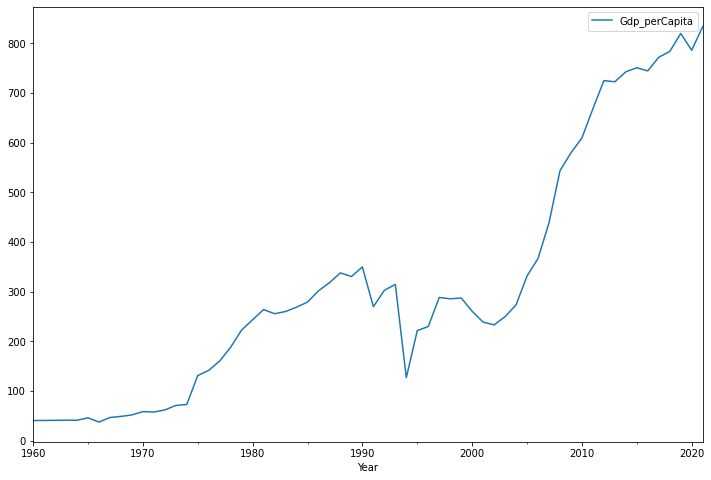

In [ ]:
# graph
df.columns = ['Gdp_perCapita']
df.plot(figsize=(12,8))

In [ ]:
#lags 
df['perc_Lastyear']=df['Gdp_perCapita'].shift(+1)
df['perc_2yearback']=df['Gdp_perCapita'].shift(+2)
df['perc_3yearback']=df['Gdp_perCapita'].shift(+3)
df

,Gdp_perCapita,perc_Lastyear,perc_2yearback,perc_3yearback
Year,,,,
1960-01-01,40.53721,NaN,NaN,NaN
1961-01-01,40.68927,40.53721,NaN,NaN
1962-01-01,40.94418,40.68927,40.53721,NaN
1963-01-01,41.21830,40.94418,40.68927,40.53721
1964-01-01,41.08388,41.21830,40.94418,40.68927
...,...,...,...,...
2017-01-01,772.29490,744.79440,751.11050,742.96620
2018-01-01,783.81280,772.29490,744.79440,751.11050
2019-01-01,820.17720,783.81280,772.29490,744.79440


In [ ]:
# dropping the NA
df=df.dropna()
df

,Gdp_perCapita,perc_Lastyear,perc_2yearback,perc_3yearback
Year,,,,
1963-01-01,41.21830,40.94418,40.68927,40.53721
1964-01-01,41.08388,41.21830,40.94418,40.68927
1965-01-01,45.98928,41.08388,41.21830,40.94418
1966-01-01,37.48884,45.98928,41.08388,41.21830
1967-01-01,46.64274,37.48884,45.98928,41.08388
1968-01-01,48.78410,46.64274,37.48884,45.98928
1969-01-01,51.79461,48.78410,46.64274,37.48884
1970-01-01,58.52528,51.79461,48.78410,46.64274
1971-01-01,57.58924,58.52528,51.79461,48.78410


In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
# organizing dataset(x,y)
import numpy as np
x1,x2,x3,y=df['perc_Lastyear'],df['perc_2yearback'],df['perc_3yearback'],df['Gdp_perCapita']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)

In [ ]:
print(final_x)

[[ 40.94418  40.68927  40.53721]
 [ 41.2183   40.94418  40.68927]
 [ 41.08388  41.2183   40.94418]
 [ 45.98928  41.08388  41.2183 ]
 [ 37.48884  45.98928  41.08388]
 [ 46.64274  37.48884  45.98928]
 [ 48.7841   46.64274  37.48884]
 [ 51.79461  48.7841   46.64274]
 [ 58.52528  51.79461  48.7841 ]
 [ 57.58924  58.52528  51.79461]
 [ 61.8119   57.58924  58.52528]
 [ 70.80299  61.8119   57.58924]
 [ 72.8944   70.80299  61.8119 ]
 [131.0198   72.8944   70.80299]
 [141.531   131.0198   72.8944 ]
 [160.3842  141.531   131.0198 ]
 [188.1848  160.3842  141.531  ]
 [222.8134  188.1848  160.3842 ]
 [243.4871  222.8134  188.1848 ]
 [264.0264  243.4871  222.8134 ]
 [255.637   264.0264  243.4871 ]
 [260.0054  255.637   264.0264 ]
 [268.9233  260.0054  255.637  ]
 [279.105   268.9233  260.0054 ]
 [301.7981  279.105   268.9233 ]
 [318.2065  301.7981  279.105  ]
 [337.9555  318.2065  301.7981 ]
 [330.4971  337.9555  318.2065 ]
 [349.8733  330.4971  337.9555 ]
 [269.8504  349.8733  330.4971 ]
 [302.7386

In [ ]:
# dividing data into train and test
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [ ]:
# fitting the models (randomforest and linear regression)
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-12-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

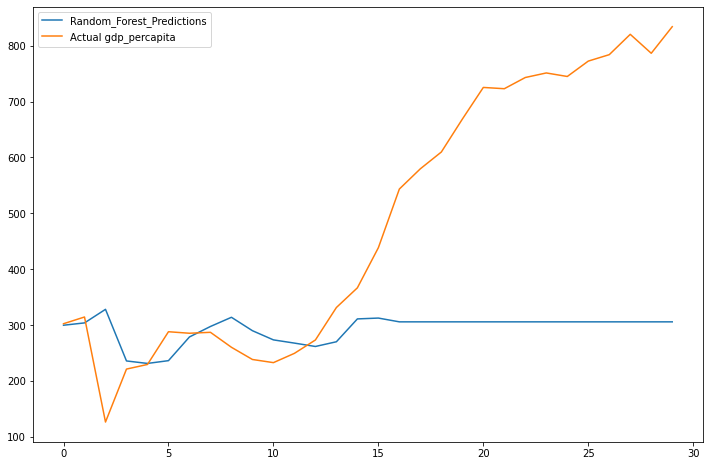

In [ ]:
# comparing prediction and actual values for Random forest 
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual gdp_percapita')
plt.legend(loc="upper left")
plt.show()

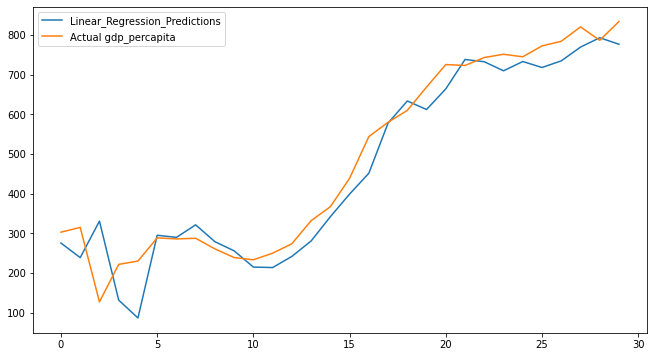

In [ ]:
#comparing prediction and actual values for linear regression model
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual gdp_percapita')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# evaluating both models using RMSE metric
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
     

In [ ]:
# linear regression has low rmse compare to random forest
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 293.1846685060633
Mean Squared Error for Linear Regression Model is: 62.09458152839868
